https://kesmarag.github.io/pde23/lectures/PartA.ipynb

### PyTorch and Tensors
PyTorch is an open-source machine learning framework that provides a flexible and dynamic approach to building and training neural networks.


- A PyTorch tensor is a multi-dimensional array.
- PyTorch tensors share several similarities in syntax and functionality with NumPy arrays.
- Tensors in PyTorch support automatic computation of gradients. 
- The gradients obtain by calling the backward method.

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip3 install matplotlib
!pip3 install scipy

Looking in indexes: https://download.pytorch.org/whl/cpu


In [4]:
import torch

# example of a Tensor in PyTorch

x = torch.tensor([1.0, 2.0], requires_grad=True)

f = x**3 - x**2 + x + 1.0

grad_f = 3.0*x**2 - 2.0*x + 1.0

print('manual grad_f(x) =', grad_f.data)

f_sum = f.sum()
f_sum.backward()

print('auto grad_f(x)',x.grad.data)

manual grad_f(x) = tensor([2., 9.])
auto grad_f(x) tensor([2., 9.])


### Create a Neural Network in Pytorch - Boilerplate code
A neural network is a computational model composed of interconnected nodes and a large number of free parameters, enabling it after the a training phase using data to approximate complex functions



- Structure of the network and initialization
- Forward pass
- Loss function

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class ANN_Name(nn.Module):
    def __init__(self):
        super(ANN_Name, self).__init__()
      
    def forward(self,x):
        pass
        
    def loss(self,x,y):
        pass


- Our class inherits from torch.nn.Module
- In __init__ method we define the parameters (weights and biases) of our model
- The forward method performs the forward pass
- The loss method calculates the objective function that measures how well the model describes the data

### A toy example - Simple Linear Regression

\\( y = w x + b + \epsilon,\ \epsilon \sim \mathcal N(0,\sigma^2)\\)

Let \\(w=2,\ b=3\\), and \\(\sigma=0.05\\). We are creating a random sample that consists of \\(2^{10}\\) pairs.

We would like to estimate the parameters \\(w,b\\) from the data.

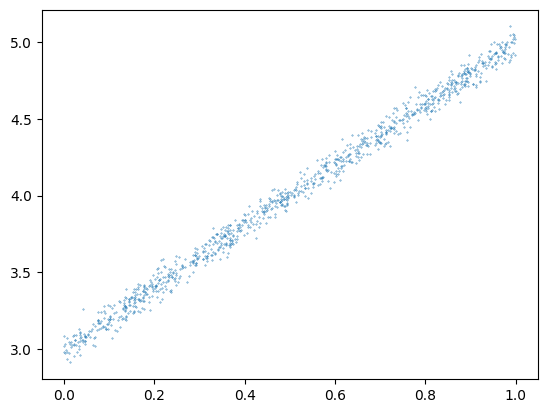

In [6]:
N = 2**10

x = torch.rand((N,1))               # sample from the uniform distribution in [0,1]
epsilon = 0.05*torch.randn(x.shape) # sample from the Gaussian distribution 
                                    # of zero mean and 0.05 standard deviation
y = 2.0*x + 3.0 + epsilon
plt.scatter(x,y,s=0.1)

### Least Mean Squares solution - Analytical Approach
In the context of linear regression, the goal is to find the best-fitting line that minimizes the sum of squared differences between the predicted values and the actual measured values. 

\\(\hat y_n = \hat w x_n + \hat b \\)

We can analytically find the parameters that minimizes the MS errors.

\\[\mathbf p = \left[ \begin{array}{c}
\hat b \\
\hat w 
\end{array}\right] = (\mathbf X^T \mathbf X)^{-1}\mathbf X^T \mathbf y\\]
where \\(\mathbf X, \ \mathbf y\\) are given as follows:
\\[ \mathbf X= \left[ \begin{array}{cc}
1 & x_1 \\
1 & x_2\\
\cdots & \cdots \\
1 & x_n \end{array} \right],\quad \mathbf y = \left[ \begin{array}{c}
y_1 \\
y_2\\
\cdots \\
y_n \end{array} \right]\\]



In [7]:
X = torch.cat([torch.ones(x.shape),x],axis=1)

In [8]:
p = torch.linalg.inv(X.T@X)@X.T@y
print(p)

tensor([[3.0043],
        [1.9940]])


### Mean Least Squares solution - Neural Network Approach

In [9]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1,bias=True) # wx+b
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

    def loss(self,x,y):
        yhat = self.forward(x)
        return torch.mean((yhat-y)**2)

model = LinearRegression()

#### Training - Gradient Descent

In [10]:
iterations = 10000

for i in range(iterations):
    z = model.loss(x,y).backward()
    model.linear.weight.data-=0.01*model.linear.weight.grad
    model.linear.bias.data-=0.01*model.linear.bias.grad
    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()

In [11]:
print(model.linear.bias.data)
print(model.linear.weight.data)

tensor([3.0043])
tensor([[1.9939]])


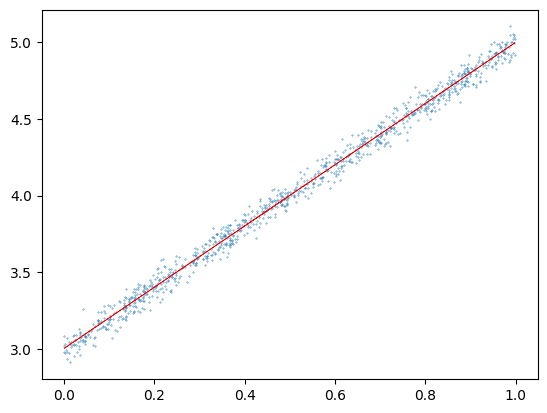

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=0.1)
plt.plot(x,model.forward(x).detach().numpy(),c='red',lw=0.5)

In [13]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1,bias=True)
        
    def forward(self,x):
        yhat = self.linear(x).reshape(-1,1)
        return yhat

    def loss(self,x,y):
        yhat = self.forward(x)
        return torch.mean((yhat-y)**2)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

    def loss(self, x, y):
        yhat = self.forward(x)
        return torch.mean((yhat - y)**2)

    def fit(self, x, y, lr=0.01, iterations=10000):
        opt = optim.Adam(self.parameters(), lr=lr)
        for it in range(iterations):
            opt.zero_grad()
            loss = self.loss(x, y)
            loss.backward()
            opt.step()

model = LinearRegression()

model.fit(x,y)

In [15]:
print(model.linear.bias.data)
print(model.linear.weight.data)

tensor([3.0043])
tensor([[1.9940]])


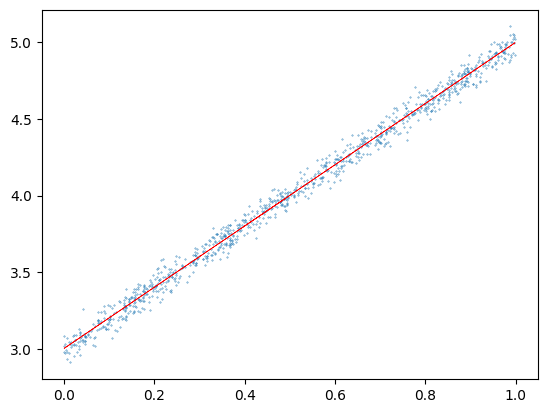

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=0.1)
plt.plot(x,model.forward(x).detach().numpy(),c='red',lw=0.5)

### Multivariate Linear Regression

Follow the NN approach to train a linear model with two free variables

\\( y = w_1 x_1 + w_2 x_2 + \beta + \epsilon,\ \epsilon \sim \mathcal N(0,\sigma^2)\\)

